<center>
<h1 style="font-family: 'Times New Roman', Times, serif; font-size: 60px;">DAA</h1>
<h2 style="font-family: 'Times New Roman', Times, serif; font-size: 40px;">Random Forest</h2>
</center>

<font face="Times New Roman">

<h3 style="font-family: 'Times New Roman'">Imports</h3>

In [14]:
# Import necessary libraries
import pandas as pd                                                                                 # For data manipulation and analysis
import matplotlib.pyplot as plt                                                                     # For data visualization
import seaborn as sns                                                                               # For enhanced data visualization
from sklearn.model_selection import train_test_split                                                # For splitting data
from sklearn.ensemble import RandomForestClassifier                                                 # For the Random Forest classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer    # For evaluating model performance
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV                # For cross-validation

<h3 style="font-family: 'Times New Roman'">Load All Datasets</h3>

In [15]:
final = pd.read_csv("Ficheiros/Ficheiros_Models/Final.csv", na_filter = False)
final_teste = pd.read_csv("Ficheiros/Ficheiros_Models/Final_Teste.csv")

<h3 style="font-family: 'Times New Roman'">Random Forest</h3>

<h4 style="font-family: 'Times New Roman'">Test Locally</h4>

In [16]:
X = final.drop(columns=['injection'])
y = final['injection']

Hyperparameters of the Best Model:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: entropy
max_depth: 24
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 15
min_weight_fraction_leaf: 0.0
n_estimators: 1000
n_jobs: None
oob_score: False
random_state: 2024
verbose: 0
warm_start: False
Mean Accuracy: 88.86%
Random Forest Model Accuracy: 87.54%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2141
           1       0.55      0.17      0.27       126
           2       0.65      0.70      0.68       320
           3       0.67      0.70      0.69       328
           4       0.67      0.71      0.69       167

    accuracy                           0.88      3082
   macro avg       0.70      0.65      0.66      3082
weighted avg       0.87      0.88      0.87      3082



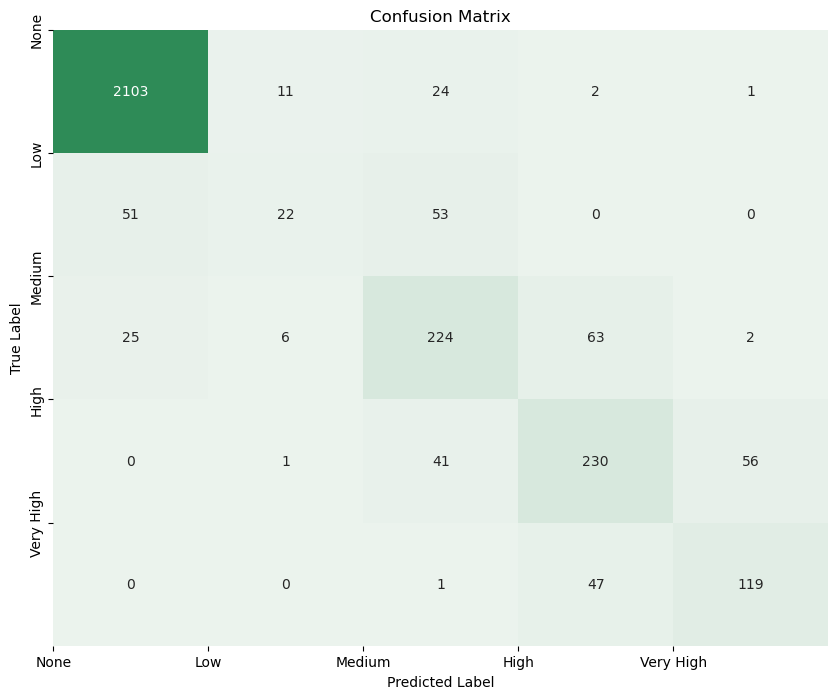

In [17]:
# Split the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

param_grid = {
    'n_estimators': [975, 1000, 1025],
    'criterion': ['gini', 'entropy'],
    'max_depth': [24, 25, 26],
    'min_samples_split': [14, 15],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    # 'n_jobs': [None, -1]
}

modelo = RandomForestClassifier(random_state=2024)
scoring = make_scorer(accuracy_score)
cv_value = 5
grid_accuracy = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring=scoring, cv=cv_value, refit=True)

grid_accuracy.fit(X_train, y_train)

best_model = grid_accuracy.best_estimator_
best_model_params = best_model.get_params()

print("Hyperparameters of the Best Model:")
for param, value in best_model_params.items():
    print(f"{param}: {value}")

# Predict on the test set
y_pred = best_model.predict(X_test)

# Print the cross-validated accuracy scores
cv_scores = grid_accuracy.cv_results_['mean_test_score']
# print("Cross-validated Accuracy Scores: {}".format(cv_scores))
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Get accuracy on the test set
accuracy_injection = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy: {:.2f}%".format(accuracy_injection * 100))

# Display classification report
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_str)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define a custom color palette
color_palette = sns.light_palette("seagreen", as_cmap=True)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color_palette, cbar=False)

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Customize tick labels
tick_labels = ['None', 'Low', 'Medium', 'High', 'Very High']
plt.xticks(ticks=range(len(tick_labels)), labels=tick_labels)
plt.yticks(ticks=range(len(tick_labels)), labels=tick_labels)

plt.show()

<h4 style="font-family: 'Times New Roman'">Kaggle</h4>

In [5]:
final_kaggle = pd.read_csv("Ficheiros/Ficheiros_Models/Final.csv", na_filter = False)
final_teste_kaggle = pd.read_csv("Ficheiros/Ficheiros_Models/Final_Teste.csv")

In [6]:
X_kaggle = final_kaggle.drop(columns=['injection'])
y_kaggle = final_kaggle['injection']

In [7]:
param_grid_kaggle = {
    'n_estimators': [1000],
    'criterion': ['entropy'],
    'max_depth': [25],
    'min_samples_split': [15],
    'min_samples_leaf': [1],
    'bootstrap': [True],
    # 'n_jobs': [None]
}

modelo_kaggle = RandomForestClassifier(random_state=2023)
scoring_kaggle = make_scorer(accuracy_score)
cv_value_kaggle = 10
grid_accuracy_kaggle = GridSearchCV(estimator=modelo_kaggle, param_grid=param_grid_kaggle, scoring=scoring_kaggle, cv=cv_value_kaggle, refit=True)

grid_accuracy_kaggle.fit(X_kaggle, y_kaggle)

best_model_kaggle = grid_accuracy_kaggle.best_estimator_
X_teste_kaggle = final_teste
y_pred_kaggle = best_model_kaggle.predict(X_teste_kaggle)

In [8]:
reverse_mapping = {0: 'None', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

# Aplica o mapeamento inverso às previsões 'y_pred'
y_pred_kaggle = [reverse_mapping[pred] for pred in y_pred_kaggle]

In [9]:
# Salvar as previsões em 'prediction_results.csv'
with open('Outputs/Random_Forest.csv', 'w') as file:
    file.write("RowId,Result\n")
    for row_id, prediction in enumerate(y_pred_kaggle, start=1):
        file.write(f"{row_id},{prediction}\n")

print("Previsões salvas em Random_Forest.csv")

Previsões salvas em Random_Forest.csv
